In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# https://www.kaggle.com/datasets/prathamtripathi/drug-classification
# load the dataset

df = pd.read_csv('drug200.csv')

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


### Data Preprocessing

In [4]:
df.shape        # 200 datapoints with 6 features

(200, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
# printing the categories in each feature

print(df["Drug"].unique())
print(df["Cholesterol"].unique())
print(df["BP"].unique())
print(df["Sex"].unique())

['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']
['HIGH' 'NORMAL']
['HIGH' 'LOW' 'NORMAL']
['F' 'M']


In [7]:
# checking for null values

df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<AxesSubplot: xlabel='Drug', ylabel='count'>

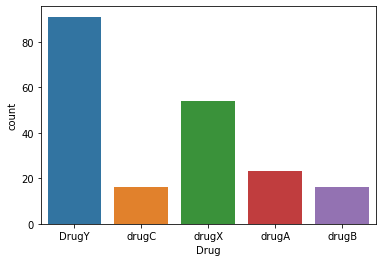

In [8]:
sns.countplot(x = 'Drug', data = df)

<AxesSubplot: xlabel='Sex', ylabel='count'>

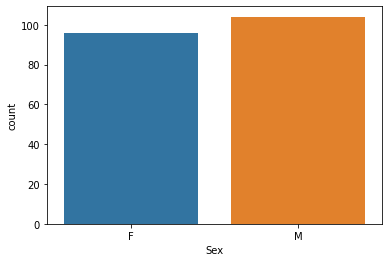

In [9]:
sns.countplot(x = 'Sex', data = df)

<AxesSubplot: xlabel='BP', ylabel='count'>

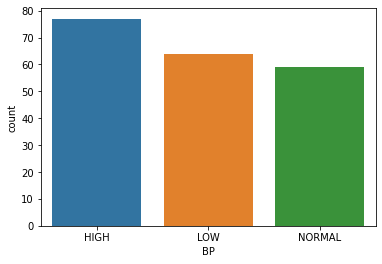

In [10]:
sns.countplot(x = 'BP', data = df)

<AxesSubplot: xlabel='Cholesterol', ylabel='count'>

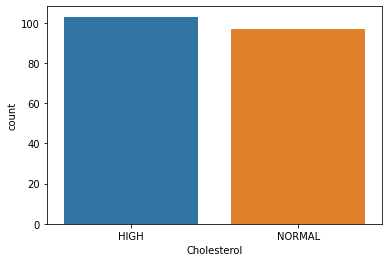

In [11]:
sns.countplot(x = 'Cholesterol', data = df)

<AxesSubplot: xlabel='Na_to_K', ylabel='Count'>

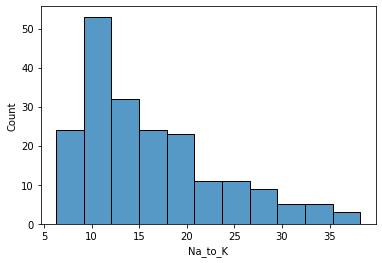

In [12]:
# distribution of Na_to_K values

sns.histplot(x ='Na_to_K', data = df )

In [13]:
# # replacing categories with numbers

# df.Sex = df.Sex.replace({'M', 'F'},{1,2})
# df.Cholesterol = df.Cholesterol.replace({'NORMAL', 'HIGH'},{1,2})
# df.BP = df.BP.replace({'LOW','NORMAL', 'HIGH'},{-1,0,1})
# df.head()

### Data splitting into X and Y

In [14]:
X = df.drop(columns = 'Drug')
Y = df['Drug']

In [15]:
# one hot encoding on X

X = pd.get_dummies(X,columns=['Sex','BP','Cholesterol'],drop_first = True)

In [16]:
# label encoding on Y

le = LabelEncoder()

Y = le.fit_transform(Y)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split (X,Y,test_size=0.3,random_state=2)

In [18]:
X_train

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
28,39,22.697,0,1,0,1
133,24,25.786,1,0,1,0
94,56,15.015,1,1,0,0
42,50,15.790,1,0,1,1
169,20,11.262,0,0,0,0
...,...,...,...,...,...,...
43,23,12.260,1,0,1,0
22,47,30.568,1,1,0,1
72,24,10.605,0,0,1,0
15,16,15.516,0,0,0,1


### Feature Scaling

In [19]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [20]:
# one hot encoding for using 'categorical_entropy' as loss

# Y_train = keras.utils.to_categorical(Y_train)
# Y_test = keras.utils.to_categorical(Y_test) 

### Model Building

In [21]:
model = keras.models.Sequential([
    keras.layers.Dense(80, input_dim=6, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(48, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(5, activation='softmax')   # as there are 5 unique drugs
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                560       
                                                                 
 dense_1 (Dense)             (None, 64)                5184      
                                                                 
 dense_2 (Dense)             (None, 48)                3120      
                                                                 
 dense_3 (Dense)             (None, 16)                784       
                                                                 
 dense_4 (Dense)             (None, 5)                 85        
                                                                 
Total params: 9,733
Trainable params: 9,733
Non-trainable params: 0
_________________________________________________________________


### Model Compilation

In [23]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model.fit(X_train,Y_train,epochs=25, batch_size = 6)

Epoch 1/25
24/24 [==============================] - 1s 4ms/step - loss: 1.5124 - accuracy: 0.3643
Epoch 2/25
24/24 [==============================] - 0s 4ms/step - loss: 1.1143 - accuracy: 0.6571
Epoch 3/25
24/24 [==============================] - 0s 4ms/step - loss: 0.8050 - accuracy: 0.7000
Epoch 4/25
24/24 [==============================] - 0s 4ms/step - loss: 0.6051 - accuracy: 0.7929
Epoch 5/25
24/24 [==============================] - 0s 4ms/step - loss: 0.4874 - accuracy: 0.8214
Epoch 6/25
24/24 [==============================] - 0s 4ms/step - loss: 0.3781 - accuracy: 0.8714
Epoch 7/25
24/24 [==============================] - 0s 4ms/step - loss: 0.3096 - accuracy: 0.8786
Epoch 8/25
24/24 [==============================] - 0s 4ms/step - loss: 0.2539 - accuracy: 0.8786
Epoch 9/25
24/24 [==============================] - 0s 4ms/step - loss: 0.2032 - accuracy: 0.9214
Epoch 10/25
24/24 [==============================] - 0s 4ms/step - loss: 0.1646 - accuracy: 0.9429
Epoch 11/25
24/24 [

In [25]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.3806 - accuracy: 0.9000


[0.3805708587169647, 0.8999999761581421]

#### This ANN Drug Classification model is achieving a test accuracy of around 90%